# Power Outage Detection in Puerto Rico Using Nighttime Lights Accessed through the ArcGIS API for Python

## By Jazmine Pritchett

In September 2017, Puerto Rico was hit by two devestating hurricanes. Category 5 hurricane, Irma, passed close to the main island on September 7th, causing widespread outages. This event was followed by Hurricane Maria, which made landfall on September 20th. The impact of damage, knowcked out over 80% of Puerto Rico's electric grid leaving residents without power for months, and somes areas not having restoration until a year later. These events resulted in the longest blackout in U.S. history.

More information - https://www.rand.org/hsrd/hsoac/projects/puerto-rico-recovery/hurricanes-irma-and-maria.html


This project is an opportunity to start exploring how nighttime lights datasets, which monitor human activity patterns, can be used to understand the urban environment and the risks surrounding it. Monitoring disruptions to the electrical grid is needed for better disaster response and long-term recovery efforts. This workflow was developed by using the ArcGIS API for python, but can be used in various applications including through  Google Earth Engine and python scripting with the Arcpy package. In the future I hope to explore how to extract nighttime light intensity from satellite imagery and further develop this project. 

## Section 1 - Setting Up the Workspace

The Visible Infrared Imaging Radiometer Suite (VIIRS) Nighttime Lights Monthly Cloud-Free Composite dataset is produced using average radiance  composite images from the  Earth Observation Group, Payne Institute for Public Policy. It excludes any data impacted by stray light. 

The geographic coverage of this dataset is global from 75N to 65S and coverage is affected by the length of day during different times of the year. Temperal coverage is monthly from January 2014 to June 2022 and images are stored in Geographic WGS84 (EPSG: 4326).

Earth Observation Group - https://payneinstitute.mines.edu/eog/                                              
Dataset description - https://www.arcgis.com/home/item.html?id=edabcbb5407547f5bc883018eb6e7986

In [31]:
#Import the GIS object and needed packages  
from arcgis import GIS 
from arcgis.raster import ImageryLayer
from ipywidgets import *
import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#Connect to object
gis = GIS('home') 

<Item title:"VIIRS Nighttime Lights Monthly Cloud-Free Composite" type:Imagery Layer owner:esri_imagery>
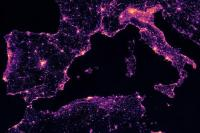

In [33]:
#Search for Nighttime Lights layer from esri_imagery
VIIRS_Nighttime_Lights_Monthly = gis.content.get('edabcbb5407547f5bc883018eb6e7986')
VIIRS_Nighttime_Lights_Monthly

In [34]:
#Generate map for area of focus 
Puerto_Rico_area = gis.map("Puerto Rico")
Puerto_Rico_area

MapView(layout=Layout(height='400px', width='100%'))

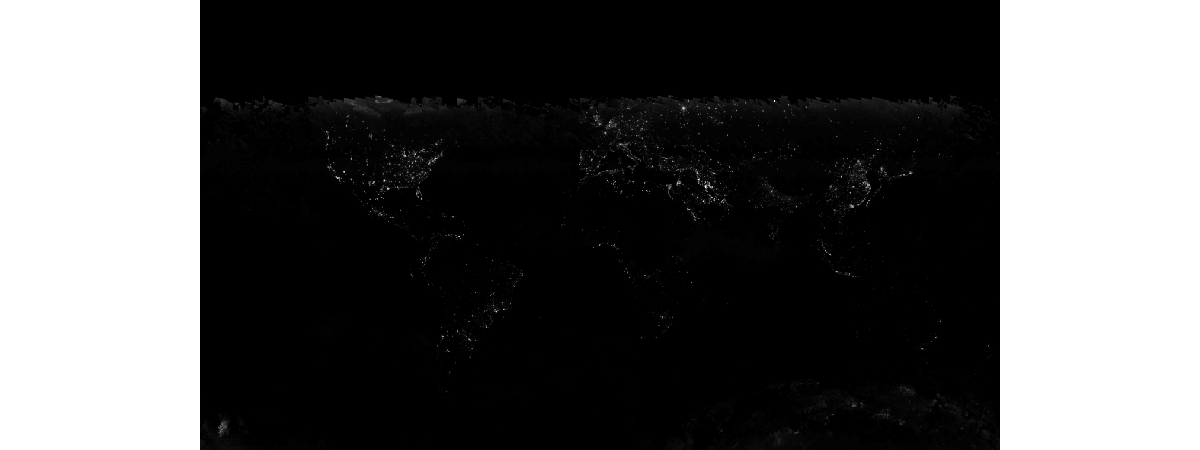

In [35]:
#Generate imagery layer
imagery_layer = VIIRS_Nighttime_Lights_Monthly.layers[0]
imagery_layer

In [36]:
#Look at fields/propertis of layer
for f in imagery_layer.properties.fields: print (f.name)

OBJECTID
Shape
Name
MinPS
MaxPS
LowPS
HighPS
Category
Tag
GroupName
ProductName
CenterX
CenterY
ZOrder
Date
Shape_Length
Shape_Area


## Section 2 - Nighttime Lights Analysis

VIIRS imagery layer is applied to a map of Puerto Rico and various analyses on different time frames surrounding the events of Hurricane Irma and Maria are conducted.

In [37]:
#Add layer to generated map of Puerto Rico 
Puerto_Rico_map = gis.map("Puerto Rico")
Puerto_Rico_map.add_layer(imagery_layer)
Puerto_Rico_map

MapView(layout=Layout(height='400px', width='100%'))

Hurricane Irma and Maria made landfall in September of 2017. A map is generated to show coverage in August of 2017 before the power outage event, assuming normal intensity. 


In [38]:
# Define the start and end dates for August 2017
start_date_aug = dt.datetime(2017, 8, 1)
end_date_aug = dt.datetime(2017, 8, 31)

# Filter the imagery layer based on the time range for August 2017
filtered_layer_aug = imagery_layer.filter_by(time=[start_date_aug, end_date_aug])

# Create a new map and add the filtered imagery layer to it
Puerto_Rico_map_aug = gis.map("Puerto Rico")
Puerto_Rico_map_aug.add_layer(filtered_layer_aug)

# Display the new map for August 2017
Puerto_Rico_map_aug

MapView(layout=Layout(height='400px', width='100%'))

Map generated for Puerto Rico during September, the month of landfall. Light intensity is slightly less, reflecting the incorportation of outage events later in the month.

In [39]:
# Define the start and end dates for September 2017
start_date = dt.datetime(2017, 9, 1)
end_date = dt.datetime(2017, 9, 30)

# Filter the imagery layer based on the time range for September 2017
filtered_layer = imagery_layer.filter_by(time=[start_date, end_date])

# Create a map and add the filtered imagery layer to it
Puerto_Rico_map_sep = gis.map("Puerto Rico")
Puerto_Rico_map_sep.add_layer(filtered_layer)

# Display the map for September 2017
Puerto_Rico_map_sep

MapView(layout=Layout(height='400px', width='100%'))

Map generated for Puerto Rico during October, the month after the time frame where the hurricanes made landfall. Light intensisty is signifigantly less showing the direct impacts to the electrical grid. 

In [40]:
# Define the start and end dates for October 2017
start_date_oct = dt.datetime(2017, 10, 1)
end_date_oct = dt.datetime(2017, 10, 31)

# Filter the imagery layer based on the time range for October 2017
filtered_layer_oct = imagery_layer.filter_by(time=[start_date_oct, end_date_oct])

# Create a new map and add the filtered imagery layer to it
Puerto_Rico_map_oct = gis.map("Puerto Rico")
Puerto_Rico_map_oct.add_layer(filtered_layer_oct)

# Display the new map for October 2017
Puerto_Rico_map_oct

MapView(layout=Layout(height='400px', width='100%'))

Map generated for Puerto Rico during December, three months after the time frame where the hurricanes made landfall. Light intensisty is more than the map generated of October, but still less radiant than assumed normal levels. It is said that 100 days after Hurricane Maria, roughly half of Puerto Ricans were still without power.   

Source - https://time.com/5078536/puerto-rico-power-outages/

In [41]:
# Define the start and end dates for December 2017
start_date_dec = dt.datetime(2017, 12, 1)
end_date_dec = dt.datetime(2017, 12, 31)

# Filter the imagery layer based on the time range for December 2017
filtered_layer_dec = imagery_layer.filter_by(time=[start_date_dec, end_date_dec])

# Create a new map and add the filtered imagery layer to it
Puerto_Rico_map_dec = gis.map("Puerto Rico")
Puerto_Rico_map_dec.add_layer(filtered_layer_dec)

# Display the new map for December 2017
Puerto_Rico_map_dec

MapView(layout=Layout(height='400px', width='100%'))

It took around a year for Puerto Rico to reach full restoration of power. Map generated for August 2018, almost a year after the hurricanes made landfall in 2017. Intensity levels reflected are much more similar to August 2017. 

In [42]:
# Define the start and end dates for August 2018
start_date_aug18 = dt.datetime(2018, 8, 1)
end_date_aug18 = dt.datetime(2018, 8, 31)

# Filter the imagery layer based on the time range for August 2018
filtered_layer_aug18 = imagery_layer.filter_by(time=[start_date_aug18, end_date_aug18])

# Create a new map and add the filtered imagery layer to it
Puerto_Rico_map_aug18 = gis.map("Puerto Rico")
Puerto_Rico_map_aug18.add_layer(filtered_layer_aug)

# Display the new map for August 2018
Puerto_Rico_map_aug18

MapView(layout=Layout(height='400px', width='100%'))

Comparison of August 2017 and August 2018, an analysis to understand the radiance that is expected for Puerto Rico at assumes full power.

In [43]:
#Side- by- side comparison of before and after (Aug 2017 and Aug 2018)
Puerto_Rico_map_aug.layout=Layout(flex='1 1', padding='10px', height='300px')
Puerto_Rico_map_aug18.layout=Layout(flex='1 1', padding='10px', height='300px')

box = HBox([Puerto_Rico_map_aug, Puerto_Rico_map_aug18])
box

Comparison of August 2017 and October 2017, an analysis to understand the devestating impact that the hurricanes had on the power grid. 

In [44]:
#Side- by- side comparison of before and month after immediate hit (Aug 2017 and Oct 2017)

Puerto_Rico_map_aug.layout=Layout(flex='1 1', padding='10px', height='300px')
Puerto_Rico_map_oct.layout=Layout(flex='1 1', padding='10px', height='300px')

box2 = HBox([Puerto_Rico_map_aug, Puerto_Rico_map_oct])
box2

Comparison of September 2017 and August 2018, an analysis to understand the impact the hurricanes had on the grid and the effectiveness of restoration a year after.

In [45]:
#Side- by- side comparison of month after immediate hit and after (Sep 2017 and Aug 2018)

Puerto_Rico_map_oct.layout=Layout(flex='1 1', padding='10px', height='300px')
Puerto_Rico_map_aug18.layout=Layout(flex='1 1', padding='10px', height='300px')

box2 = HBox([Puerto_Rico_map_oct, Puerto_Rico_map_aug18])
box2

## Section 3 - Environmental Health Analysis

There is direct correlation between power outages and public health. Understanding more about the increased frequency and distribution of of outages will inform equitable disaster preparedness and response, and support future large-scale epidemiology studies. 

This section provides time series plots for Carbon Monoxide (CO) and Particulate Matter (PM 2.5), atmospheric pollutants that affect air quality. The risk of CO poisoning increases due to the increased use of alternative fuels and electricity sources. In plot 1 measuring CO concentrations in Puerto Rico from August to December, concentration signifigantly increase after September and onward.

Source - https://iopscience.iop.org/article/10.1088/1748-9326/acc7b9

Environmental mobilization of contaminants and increased emissions due to disrupted infrastructure can lead to the increase of PM 2.5. Plot 2 measures PM 2.5 concentrations from September to December, and shows that values seemed to be relatively normal. There are still studies to show that there is a relationship between power outage and hurricane impacts on PM 2.5. There must also be consideration for the fact that air quality monitors and reporting could have been impacted with the outages. Overall, it is important to continuously monitor after these events to protect public health. 

Source - https://www.mdpi.com/2071-1050/15/5/4173

In [46]:
#Import package and set the filename for CO
import pandas as pd
theDataCO = pd.read_csv('../Data/daily_CO_2017.csv')

In [47]:
#Read headers of file 
theDataCO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204927 entries, 0 to 204926
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           204927 non-null  int64  
 1   County Code          204927 non-null  int64  
 2   Site Num             204927 non-null  int64  
 3   Parameter Code       204927 non-null  int64  
 4   POC                  204927 non-null  int64  
 5   Latitude             204927 non-null  float64
 6   Longitude            204927 non-null  float64
 7   Datum                204927 non-null  object 
 8   Parameter Name       204927 non-null  object 
 9   Sample Duration      204927 non-null  object 
 10  Pollutant Standard   204927 non-null  object 
 11  Date Local           204927 non-null  object 
 12  Units of Measure     204927 non-null  object 
 13  Event Type           204927 non-null  object 
 14  Observation Count    204927 non-null  int64  
 15  Observation Perce

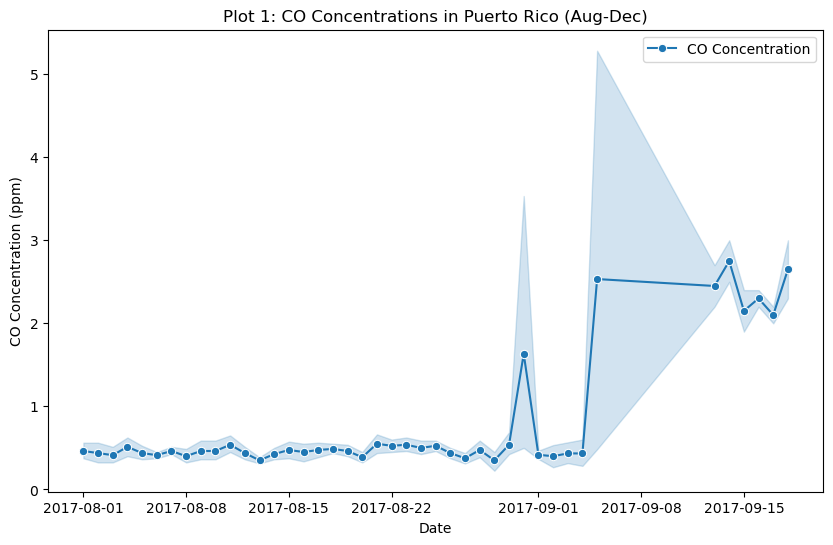

In [48]:
#Import package for time series plot
import seaborn as sns

# Convert the 'Date Local' column to datetime format
theDataCO['Date Local'] = pd.to_datetime(theDataCO['Date Local'])

# Filter data for Puerto Rico and dates between October and December (inclusive)
PR_CO_aug_dec = theDataCO[(theDataCO['State Name'] == 'Puerto Rico') & (theDataCO['Date Local'].dt.month >= 8) & (theDataCO['Date Local'].dt.month <= 12)]

# Create a time series plot for SO2 concentrations in Puerto Rico
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date Local', y='1st Max Value', data=PR_CO_aug_dec, marker='o', label='CO Concentration')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('CO Concentration (ppm)')
plt.title('Plot 1: CO Concentrations in Puerto Rico (Aug-Dec)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [49]:
#Set the filename for PM 2.5
theDataPM = pd.read_csv('../Data/daily_PM25_2017.csv')

In [50]:
#Read headers of file 
theDataPM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           450176 non-null  int64  
 1   County Code          450176 non-null  int64  
 2   Site Num             450176 non-null  int64  
 3   Parameter Code       450176 non-null  int64  
 4   POC                  450176 non-null  int64  
 5   Latitude             450176 non-null  float64
 6   Longitude            450176 non-null  float64
 7   Datum                450176 non-null  object 
 8   Parameter Name       450176 non-null  object 
 9   Sample Duration      450176 non-null  object 
 10  Pollutant Standard   272924 non-null  object 
 11  Date Local           450176 non-null  object 
 12  Units of Measure     450176 non-null  object 
 13  Event Type           450176 non-null  object 
 14  Observation Count    450176 non-null  int64  
 15  Observation Perce

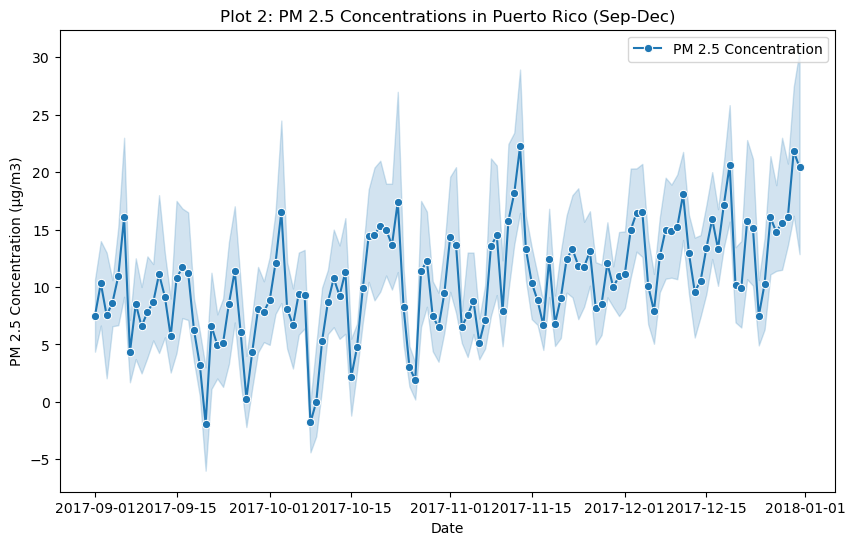

In [51]:
# Convert the 'Date Local' column to datetime format
theDataPM['Date Local'] = pd.to_datetime(theDataPM['Date Local'])

# Filter data for Puerto Rico and dates between October and December (inclusive)
PR_PM_sep_dec = theDataPM[(theDataCO['State Name'] == 'Puerto Rico') & (theDataPM['Date Local'].dt.month >= 9) & (theDataPM['Date Local'].dt.month <= 12)]

# Create a time series plot for SO2 concentrations in Puerto Rico
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date Local', y='1st Max Value', data=PR_PM_sep_dec, marker='o', label='PM 2.5 Concentration')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Plot 2: PM 2.5 Concentrations in Puerto Rico (Sep-Dec)')

# Add a legend
plt.legend()

# Show the plot
plt.show()